## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

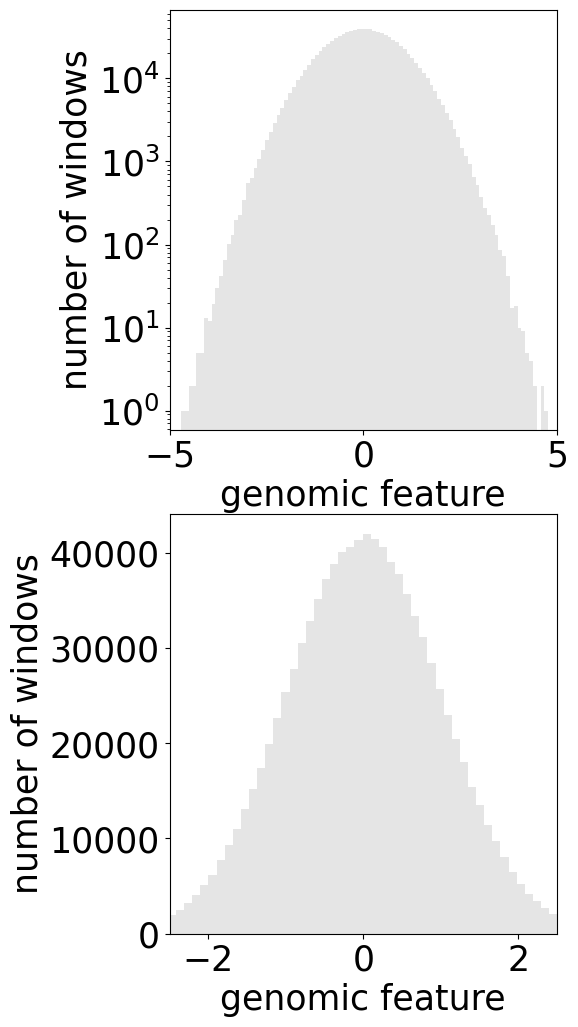

In [1]:
import matplotlib.pyplot as plt

import importlib
import generate_data
importlib.reload(generate_data)
from generate_data import plot_xs 

plt.rcParams.update({'font.size': 25})

NUMBER_EXAMPLES = 1000000 # Number of intervals

def plot_xs_wrapper():
    fig, axes = plt.subplots(2, 1, figsize=(5, 12))
    plot_xs(axes[0], NUMBER_EXAMPLES)
    plot_xs(axes[1], NUMBER_EXAMPLES, xlim=(-2.5, 2.5), yscale='linear')

plot_xs_wrapper()

## True mapping from feature to target (mimicking SNV counts)

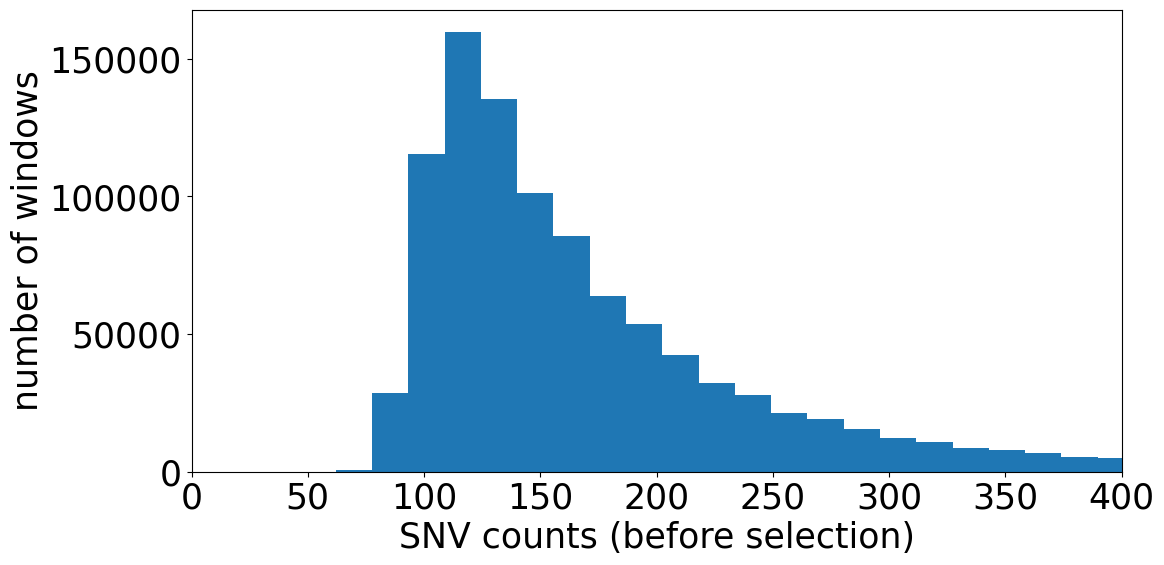

In [2]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,-0.628509,92,True
1,-1.695788,86,True
2,-1.070884,103,True
3,-0.828812,97,True
4,-0.958666,87,True
...,...,...,...
999995,1.308199,313,False
999996,-0.241338,140,False
999997,0.830603,243,False
999998,0.637357,190,False


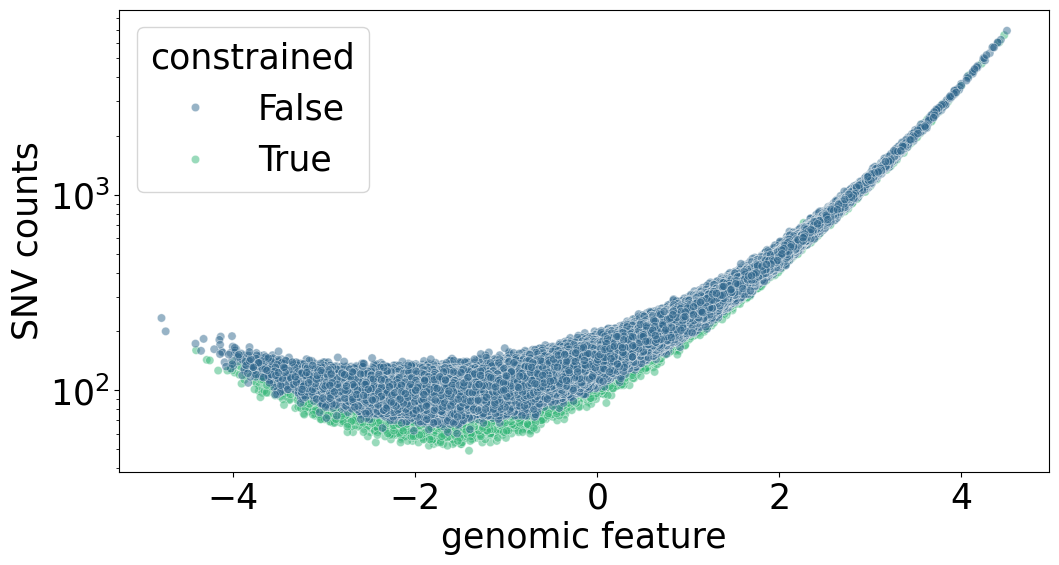

In [3]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_1

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_1)
DATA

## Fit neutral models

constant model of lambda:
alpha: 5.21 (A: 5)



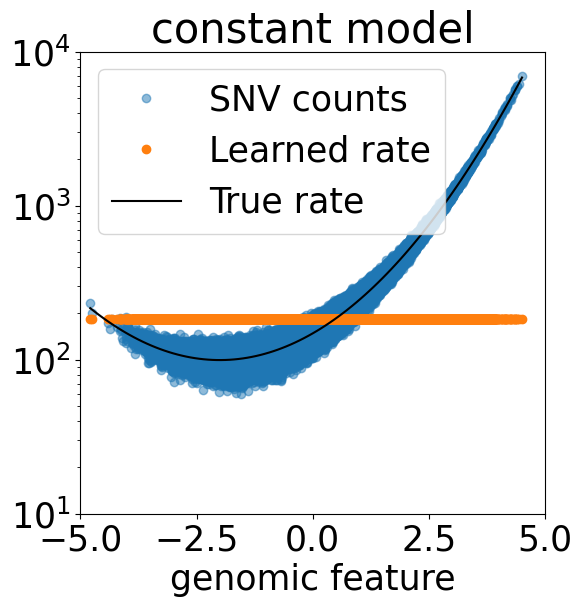

linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



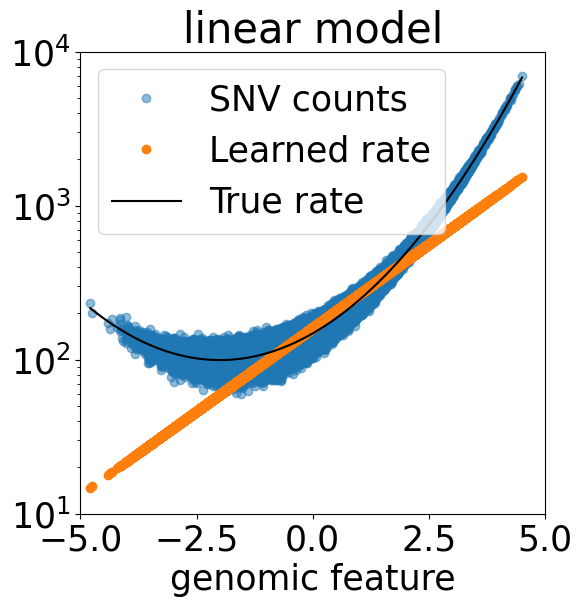

quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



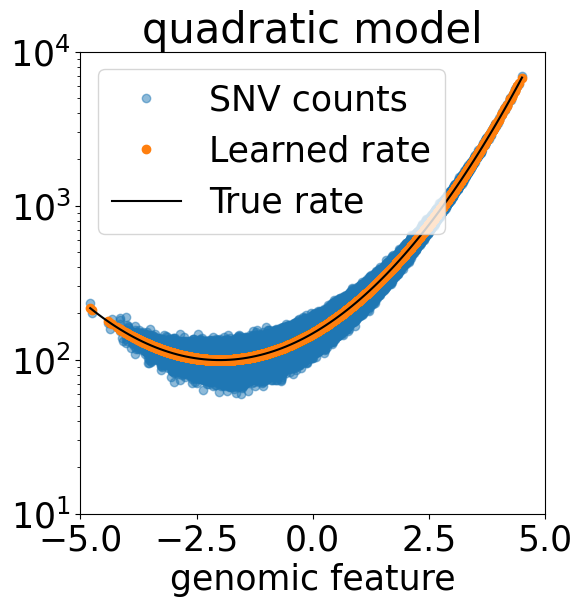

,x,y,constrained,predicted_y_constantModel,residuals_constantModel,standardized_residuals_constantModel,predicted_y_linearModel,residuals_linearModel,standardized_residuals_linearModel,x2,predicted_y_quadraticModel,residuals_quadraticModel,standardized_residuals_quadraticModel
0,-0.628509,92,True,183.306259,91.306259,6.743912,118.138786,26.138786,2.404856,0.395023,120.039818,28.039818,2.559249
1,-1.695788,86,True,183.306259,97.306259,7.187074,69.256202,-16.743798,-2.011984,2.875697,100.385968,14.385968,1.435829
2,-1.070884,103,True,183.306259,80.306259,5.931448,94.680044,-8.319956,-0.855051,1.146793,108.425188,5.425188,0.521014
3,-0.828812,97,True,183.306259,86.306259,6.374610,106.871995,9.871995,0.954933,0.686930,114.079548,17.079548,1.599088
4,-0.958666,87,True,183.306259,96.306259,7.113214,100.148643,13.148643,1.313888,0.919040,110.849004,23.849004,2.265189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.308199,313,False,183.306259,-129.693741,-9.579225,311.361321,-1.638679,-0.092867,1.711386,297.147285,-15.852715,-0.919640
999996,-0.241338,140,False,183.306259,43.306259,3.198615,143.393580,3.393580,0.283396,0.058244,135.505720,-4.494280,-0.386084
999997,0.830603,243,False,183.306259,-59.693741,-4.409001,245.175232,2.175232,0.138921,0.689901,221.627976,-21.372024,-1.435600
999998,0.637357,190,False,183.306259,-6.693741,-0.494402,222.577724,32.577724,2.183634,0.406224,199.401687,9.401687,0.665796


In [4]:
from fit_neutral_models import fit_poisson_model_wrapper

MODEL_TYPES = ['constant', 'linear', 'quadratic'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

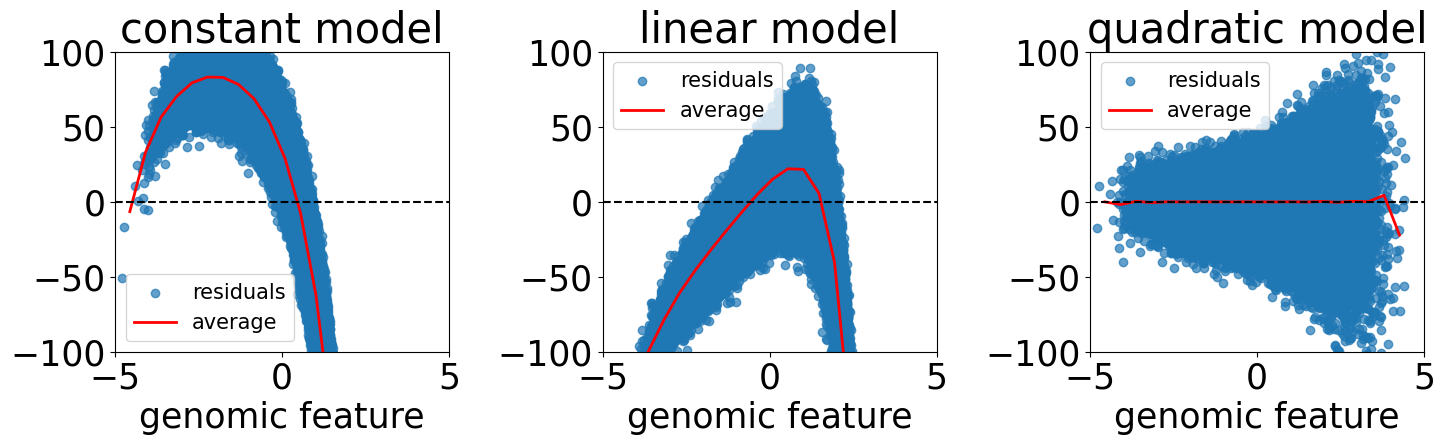

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

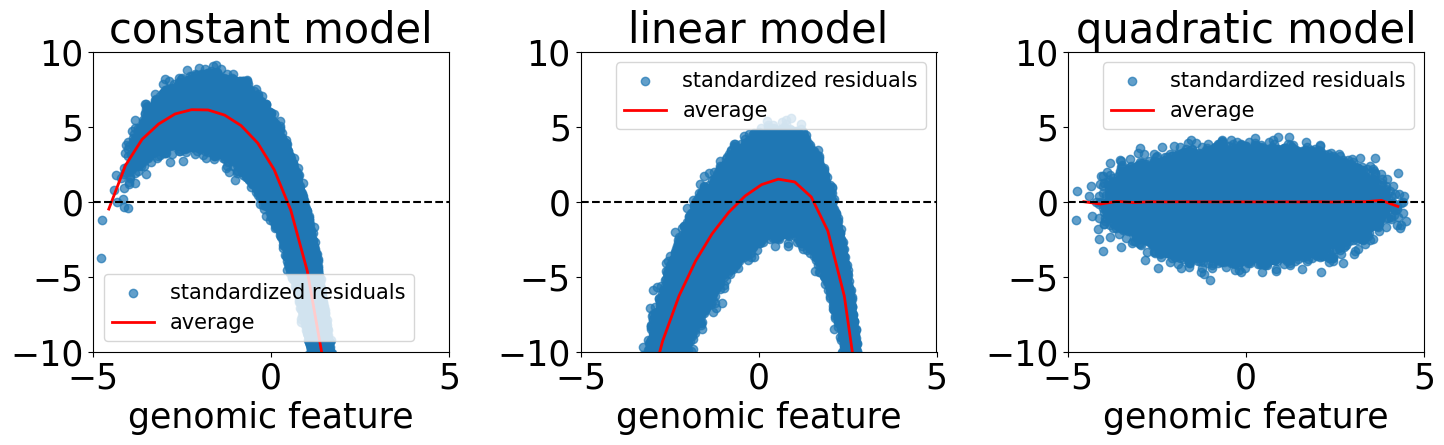

In [5]:
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 25})

plot_residuals_vs_feature_all_models(DATA, standardized=False, model_types=MODEL_TYPES)
plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES)

## Stratify neutral models' performances by x

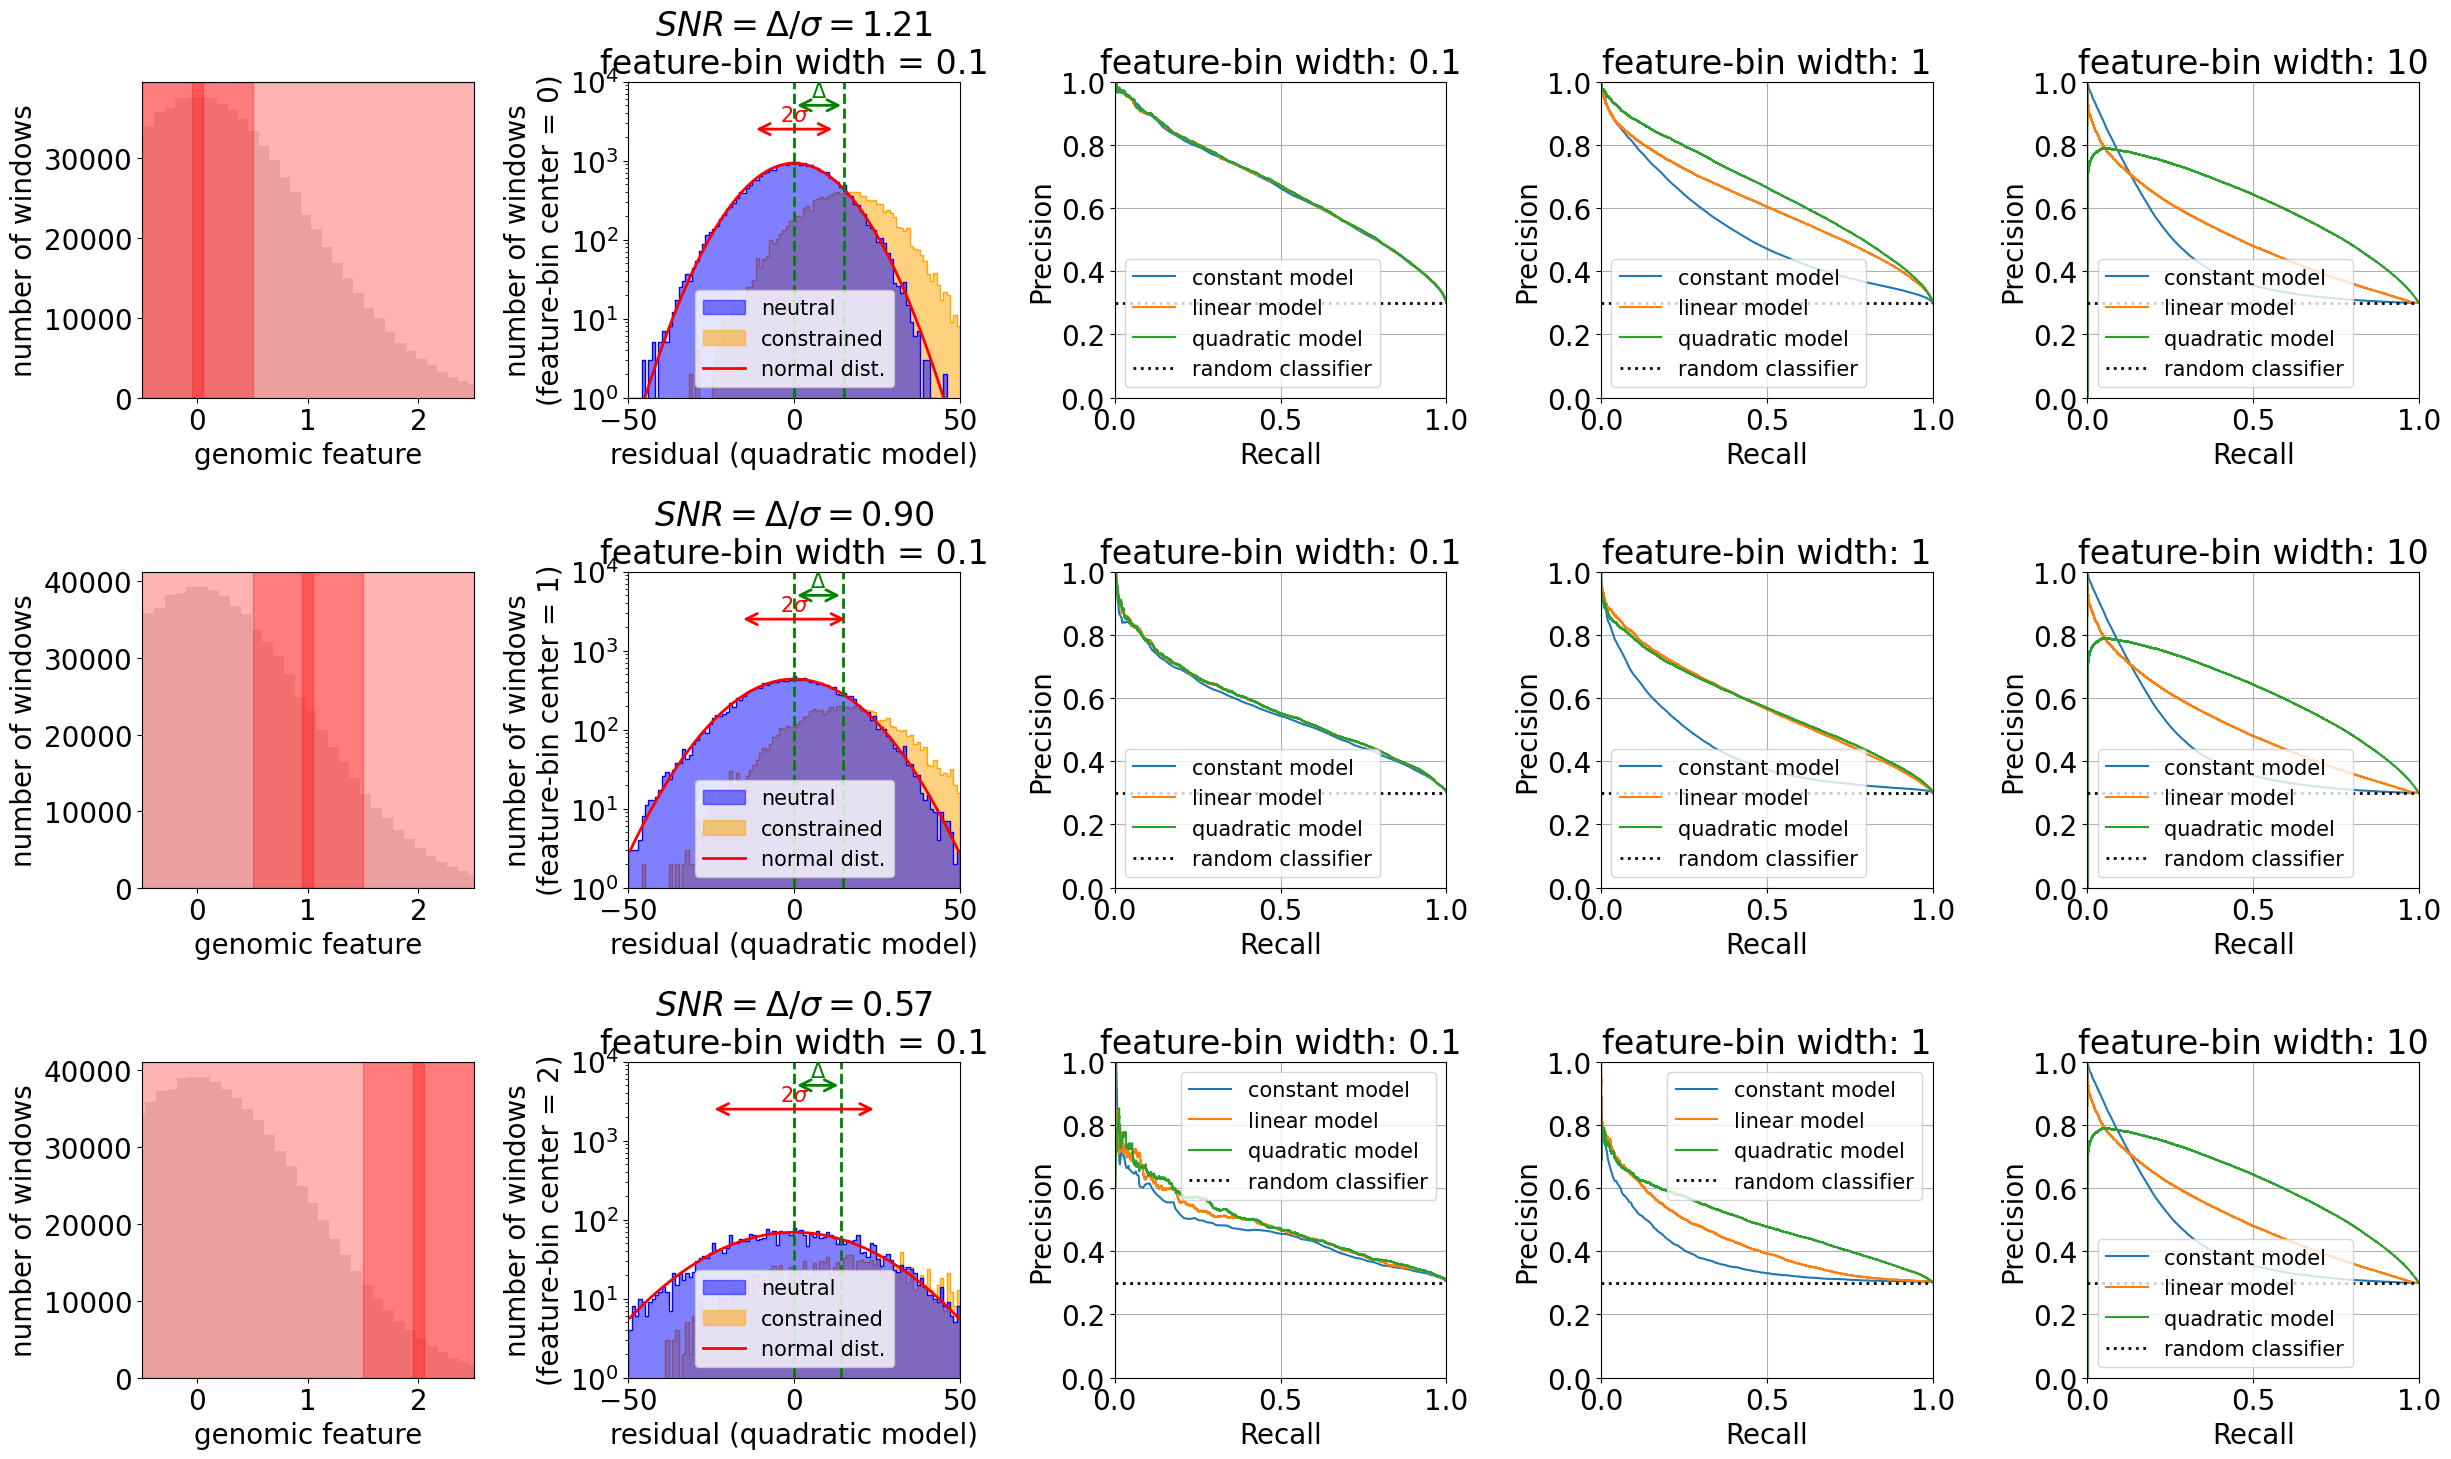

In [14]:
import importlib
import predict_constraint
importlib.reload(predict_constraint)
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-50, 50), ylim_residual=(1, 1e4), standardized=False, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1, 10])

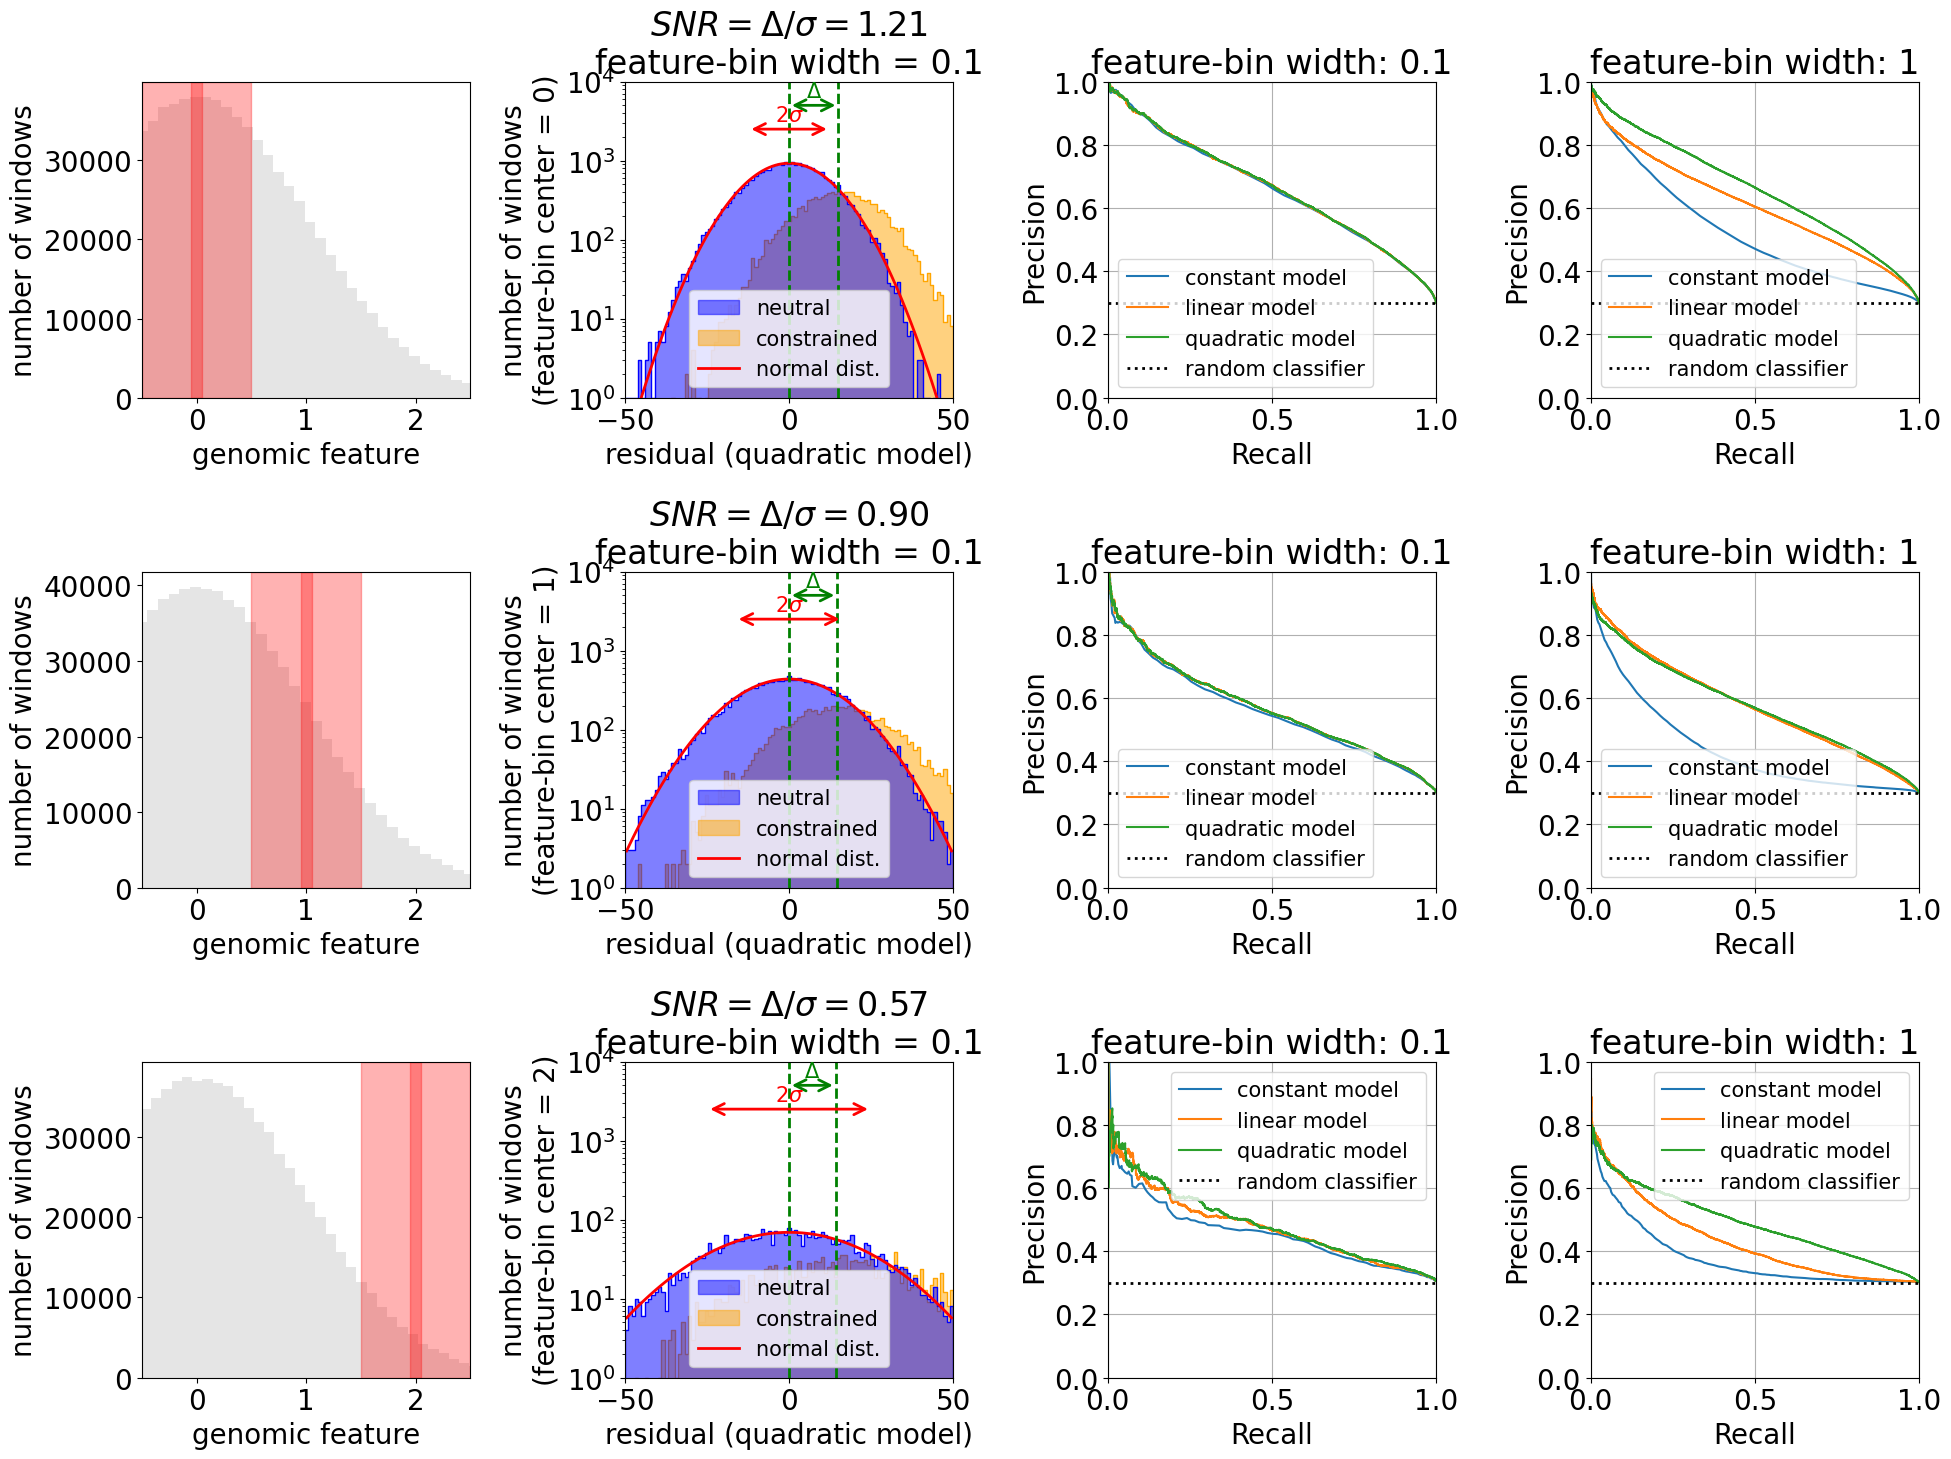

In [15]:
plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-50, 50), ylim_residual=(1, 1e4), standardized=False, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1])

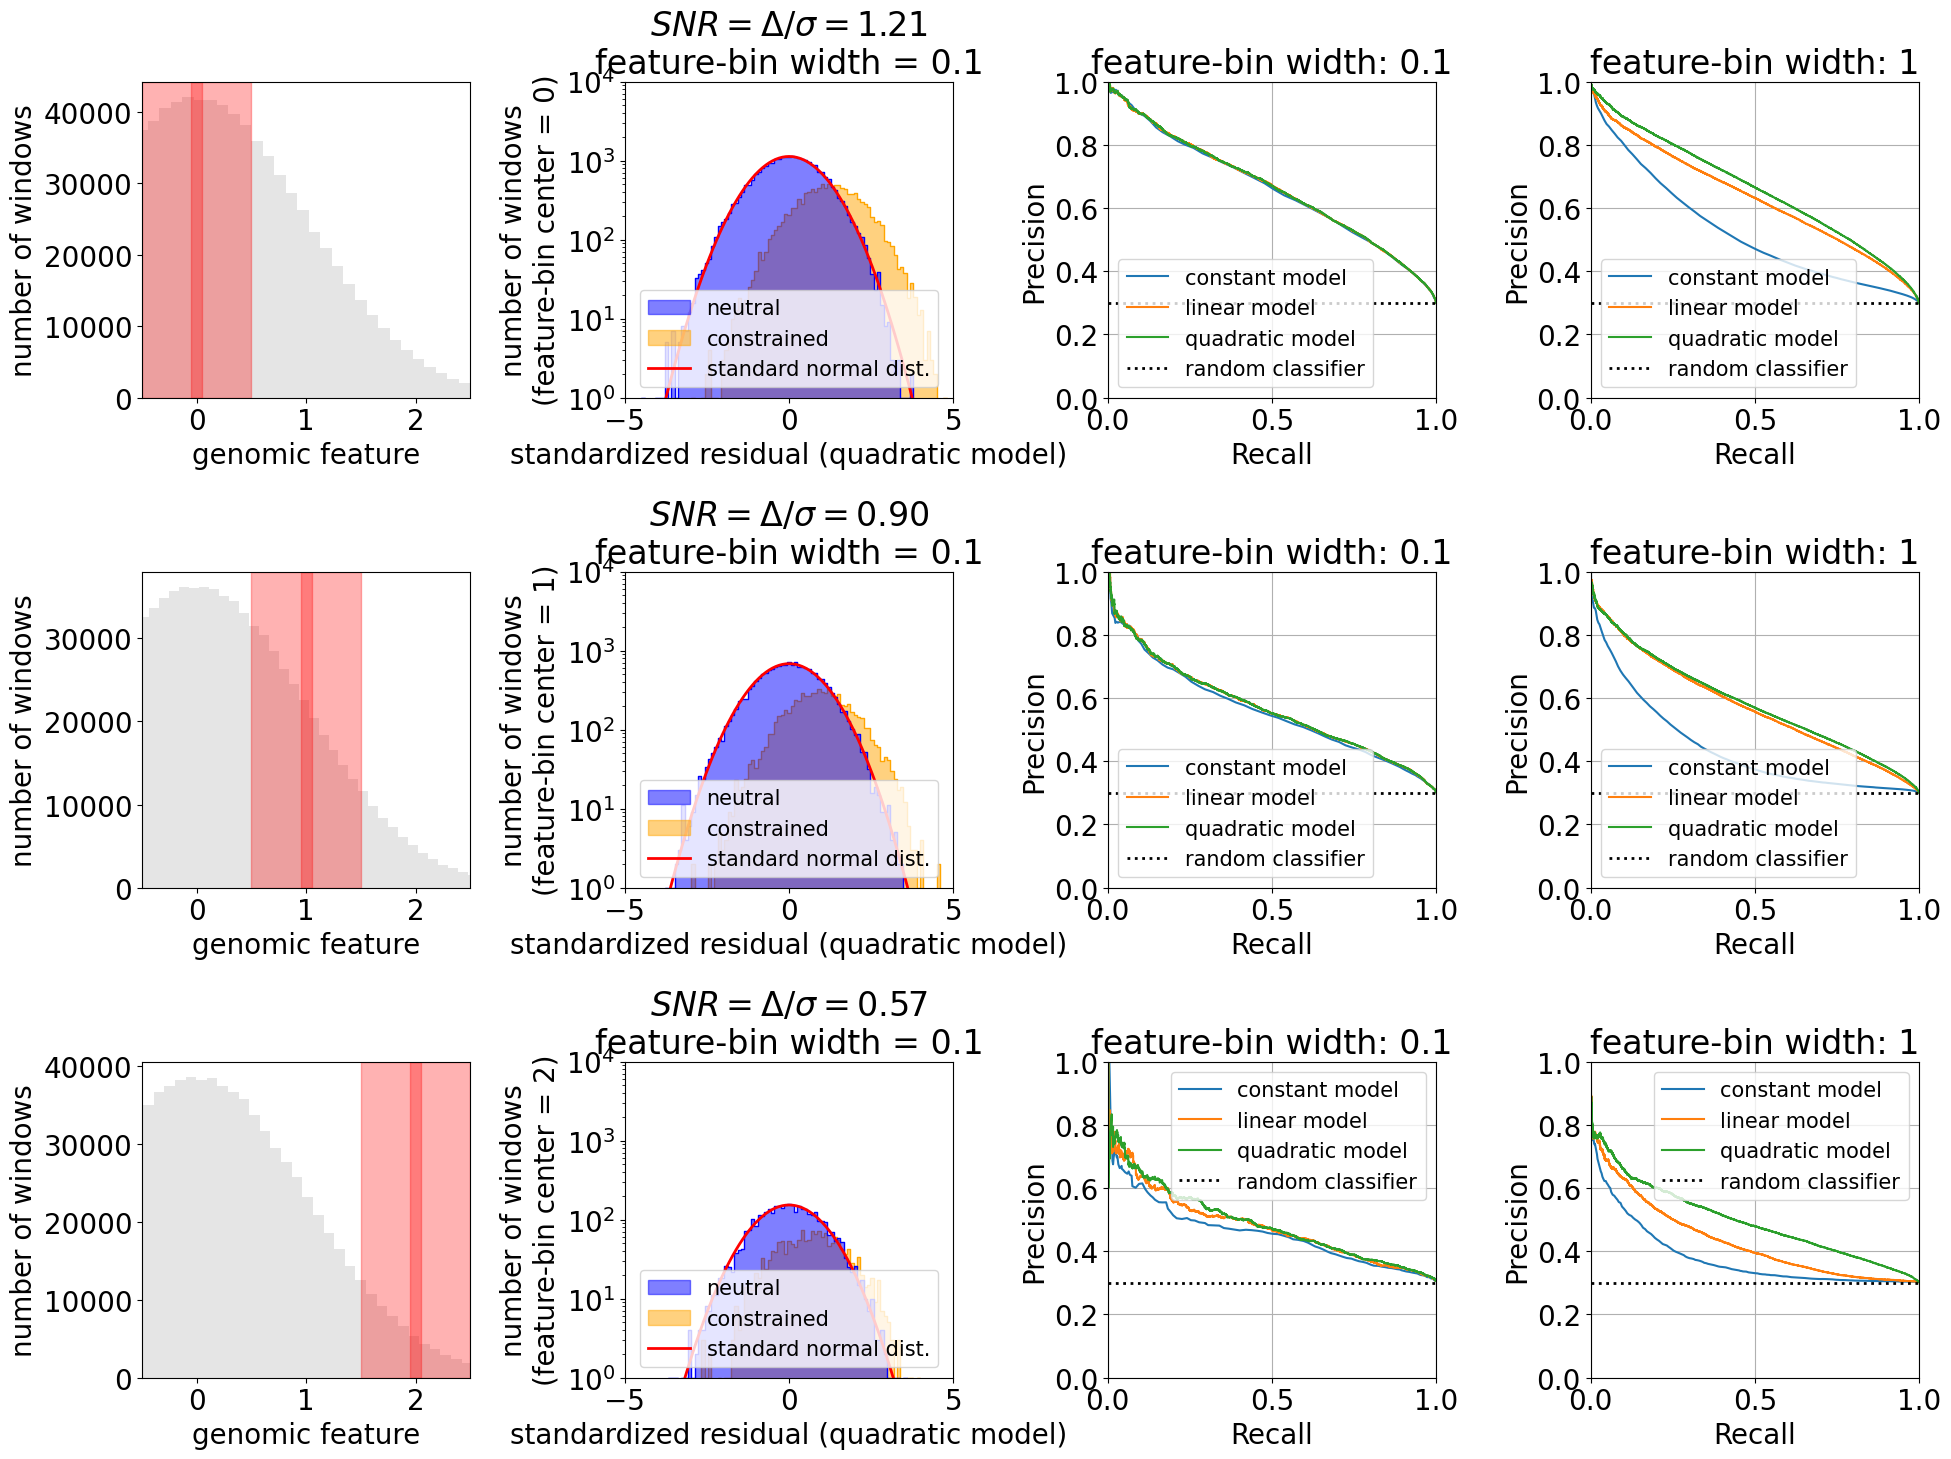

In [16]:
plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-5, 5), ylim_residual=(1, 1e4), standardized=True, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1])

## Model bias is responsible for poor genome-wide performance 

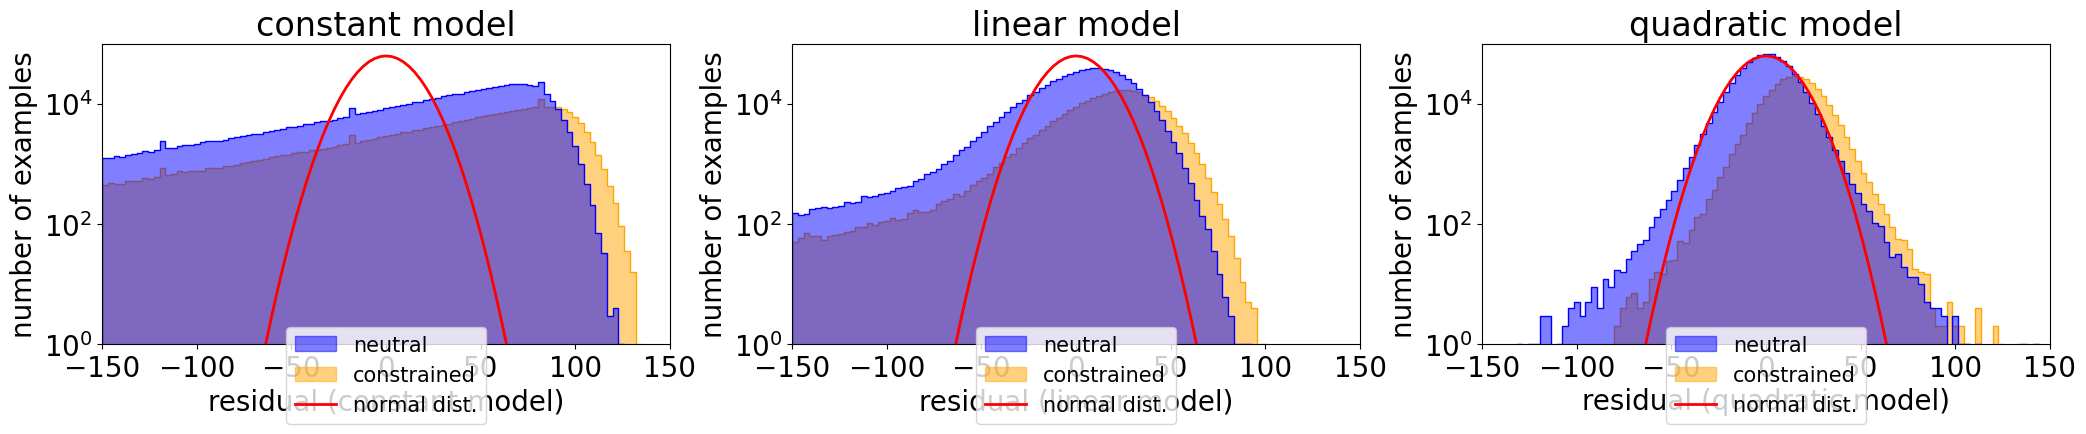

In [9]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

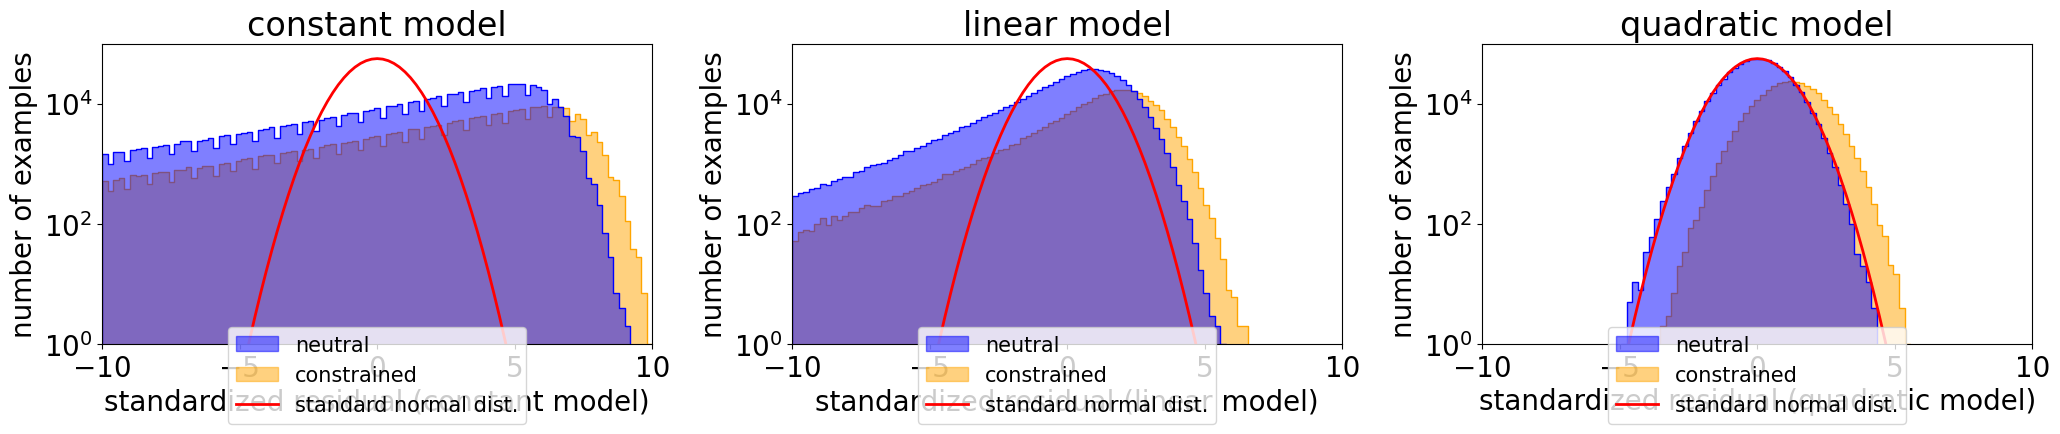

In [10]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


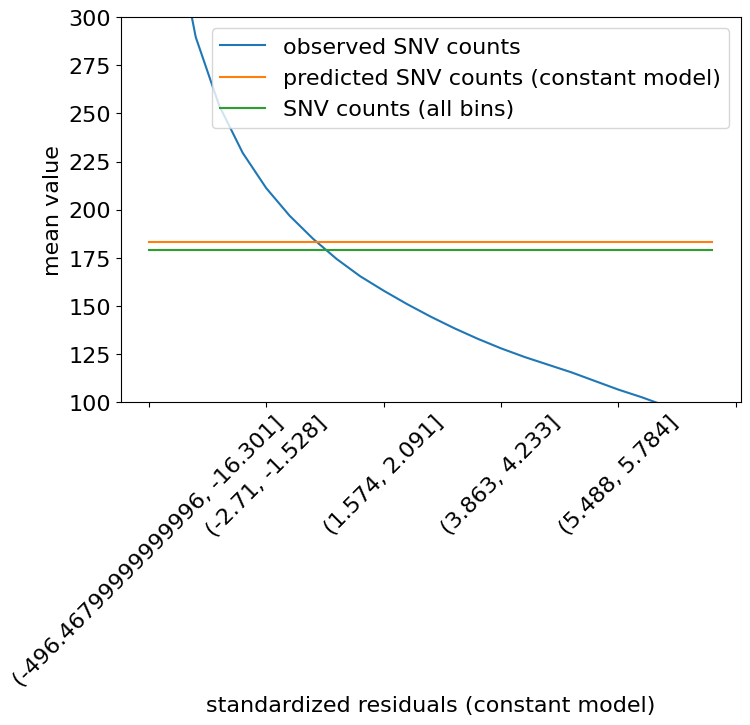

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


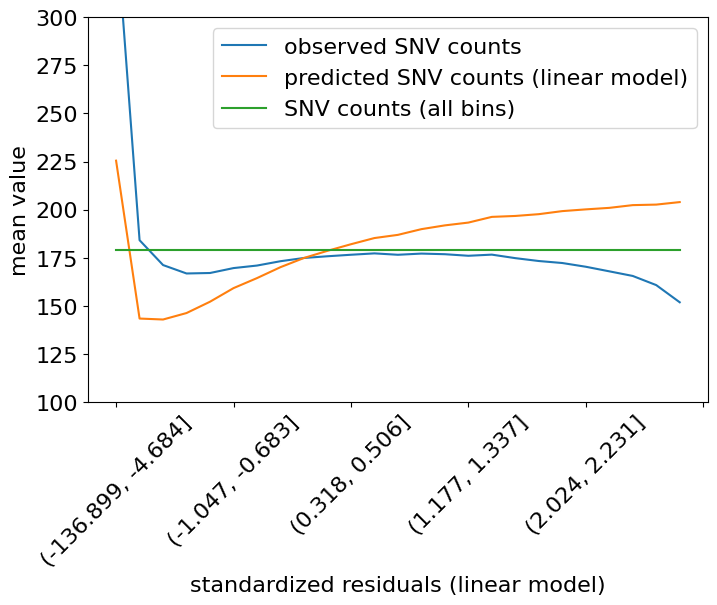

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


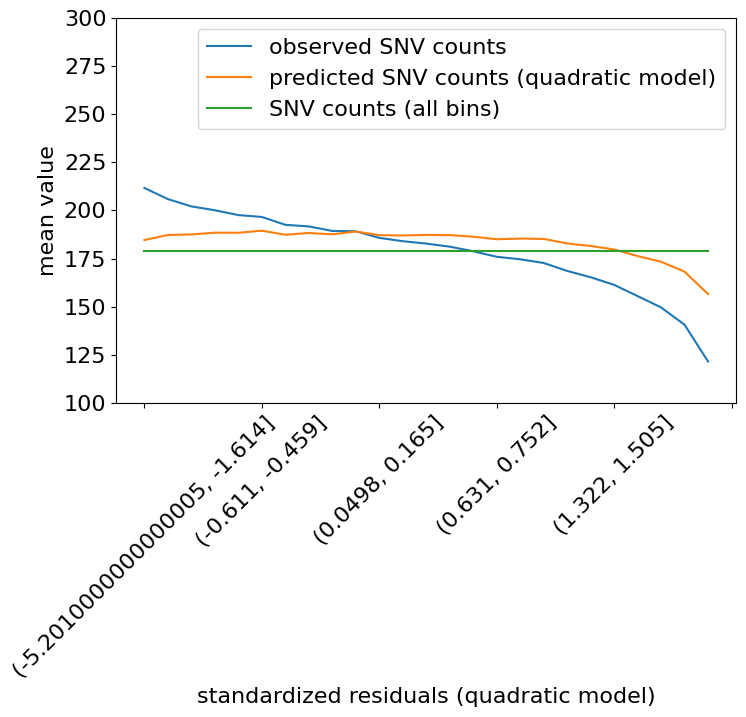

In [11]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

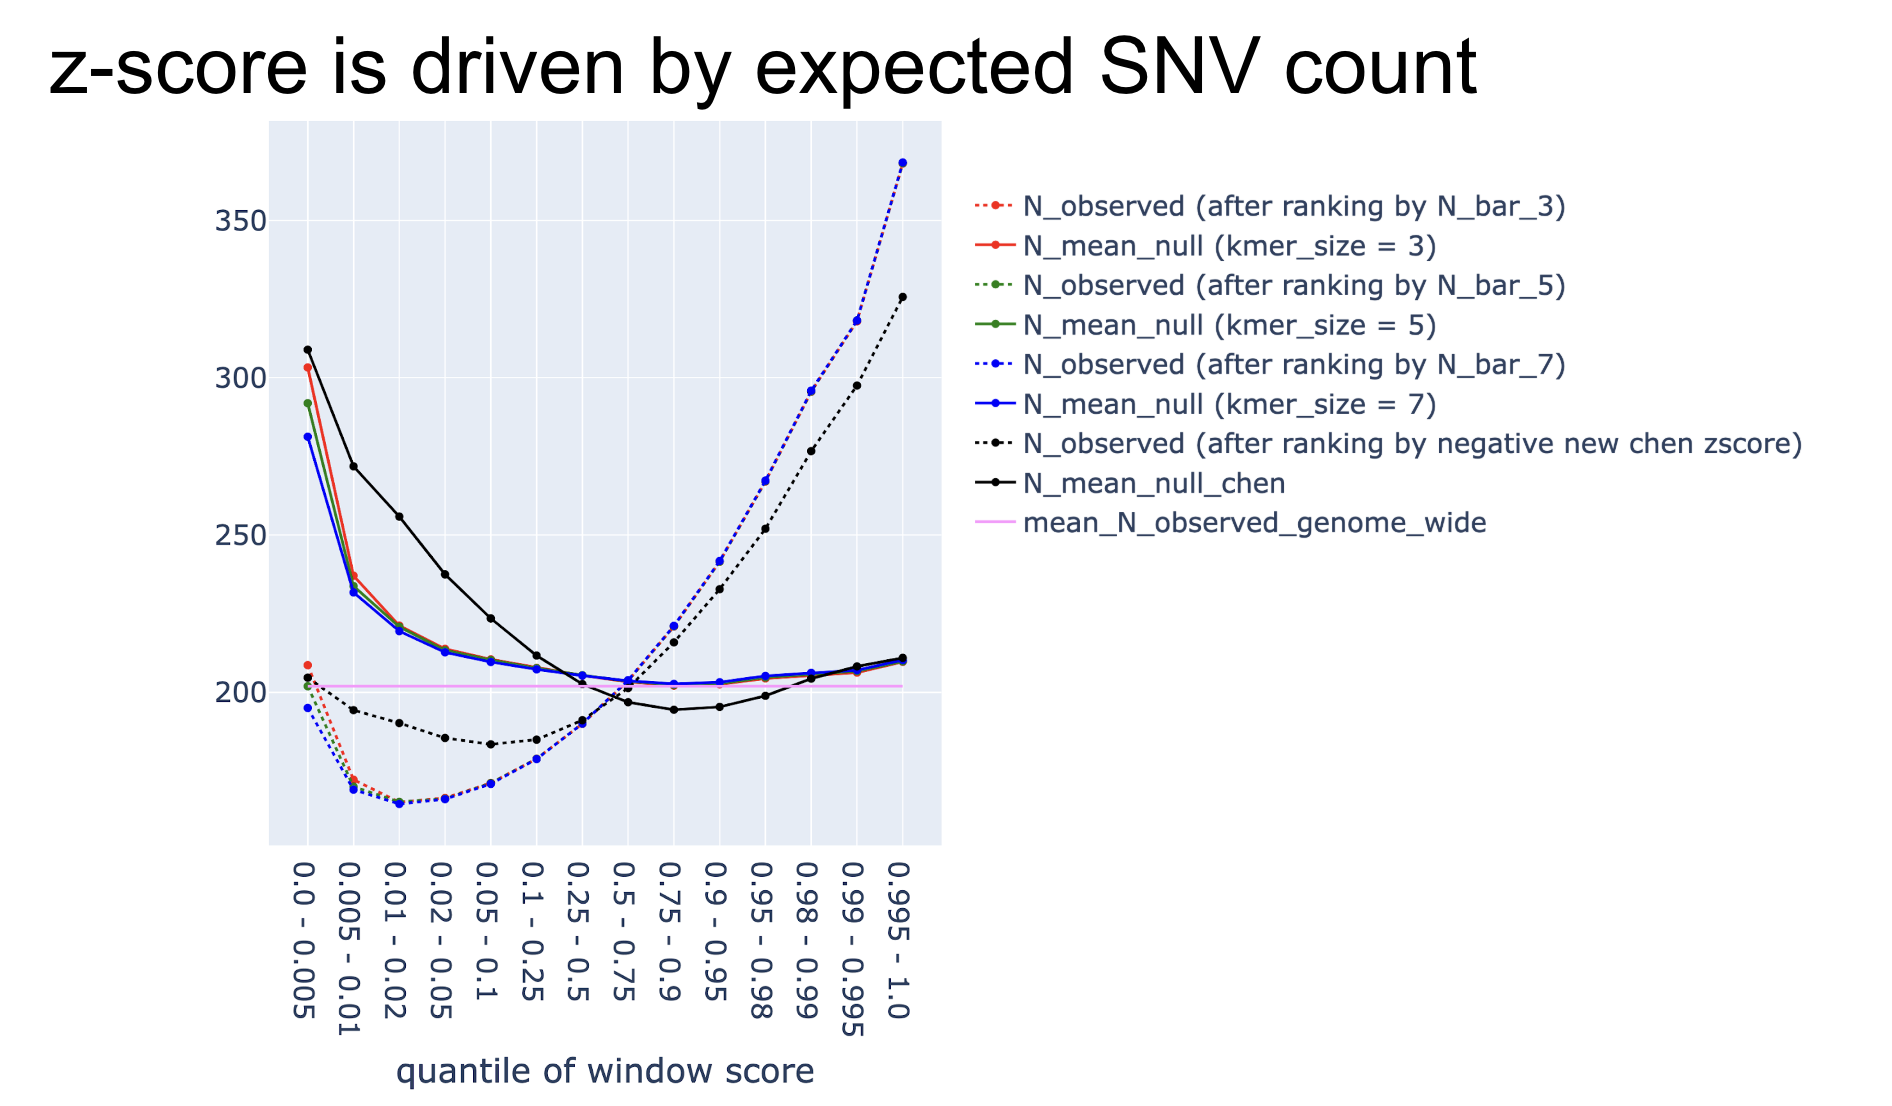

In [12]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)